In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../..")
from functools import partial
from typing import Literal

import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

from analyzer.dumperReader.reader import *
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *
from analyzer.computations.CPToSupercls import CPToSuperclusterProperties
from analyzer.computations.tracksters import tracksters_seedProperties, CPtoTrackster_properties
from analyzer.energy_resolution.fit import *

In [2]:
dumperInput = DumperInputManager(["/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/", "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v8/"], 
                                limitFileCount=None, restrictToAvailableDumperTypes=[DumperType.TICL, DumperType.TICLsupercls]
                                )

In [3]:
dumperInput.inputReaders

[SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_7.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v8/superclsDumper_7.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v8/superclsDumper_7.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_11.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v8/superclsDumper_11.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v8/superclsDumper_11.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_10.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v8/superclsDumper_10.root, DumperType.SuperclsSample=

In [4]:
res = runComputations([CPToSuperclusterProperties, CPtoTrackster_properties], dumperInput, max_workers=10)
CPtoSC_df = res[0]
CPtoTs_df = res[1]

An exception occured during processing of a sample. Exception details are : 
uproot.DeserializationError was raised in worker process whilst processing file 18
The message was while reading

    TBasket version None as uproot.models.TBasket.Model_TBasket (? bytes)
        fNbytes: -14686
        fObjlen: 391840748
        fDatime: 23022
        fKeylen: 29456
        fCycle: -6591
Members for TBasket: fNbytes?, fObjlen?, fDatime?, fKeylen?, fCycle?

attempting to get bytes 374980084:374980102
outside expected range 374950647:374956626 for this Chunk
in file /data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v8/superclsDumper_18.root


In [5]:
CPtoSC_df

supercls_id  raw_energy_seed  \
eventInternal caloparticle_id                                 
0             1                          0       136.845169   
              0                          1       220.100174   
1             0                        640        69.472084   
              1                       2180        87.641090   
2             0                        718       292.333466   
...                                    ...              ...   
18397         1                       2037       243.641602   
18398         0                        512       101.054092   
              1                       1554       104.265427   
18399         1                          6       107.894432   
              0                        735       103.033577   

                               raw_em_energy_seed  regressed_energy_seed  \
eventInternal caloparticle_id                                              
0             1                        136.845169             145.826294   
              0                        220.100174             232.166504   
1             0                         69.472084              74.440201   
              1                         87.641090              92.927574   
2             0                        292.333466             309.982697   
...                                           ...                    ...   
18397         1                        242.832504             259.342072   
18398         0                        101.054092             108.561104   
              1                        104.265427             112.525421   
18399         1                        107.894432             115.506584   
              0                        103.033577             110.423744   

                               raw_pt_seed  barycenter_eta_seed  \
eventInternal caloparticle_id                                     
0             1                  47.985485             1.701492   
              0                  78.807503            -1.701307   
1             0                  14.973318            -2.232732   
              1                  18.736288             2.233380   
2             0                  89.364548            -1.855489   
...                                    ...                  ...   
18397         1                  29.450834             2.734362   
18398         0                  25.039841            -2.030907   
              1                  25.935802             2.030832   
18399         1                  31.488230             1.893251   
              0                  31.034571            -1.891959   

                               raw_energy_supercls_sum  \
eventInternal caloparticle_id                            
0             1                             238.019699   
              0                             241.493134   
1             0                              69.472084   
              1                              87.641090   
2             0                             292.333466   
...                                                ...   
18397         1                             243.641602   
18398         0                             101.054092   
              1                             104.265427   
18399         1                             111.214256   
              0                             103.033577   

                               raw_em_energy_supercls_sum  \
eventInternal caloparticle_id                               
0             1                                238.019699   
              0                                241.493134   
1             0                                 69.472084   
              1                                 87.641090   
2             0                                292.333466   
...                                                   ...   
18397         1                                242.832504   
18398         0                               

In [6]:
CPtoTs_df

ts_id     score     sharedE  raw_energy  \
eventInternal caloparticle_id                                            
0             0                  717  0.023257  218.929138  220.100174   
              1                 2211  0.301643  135.187576  136.845169   
1             0                  641  0.176679   58.109055   69.472084   
              1                 2197  0.019125   82.800835   87.641090   
2             0                  716  0.008510  276.915649  292.333466   
...                              ...       ...         ...         ...   
18397         1                 2043  0.005083  227.183792  243.641602   
18398         0                  508  0.027324   98.031921  101.054092   
              1                 1554  0.044343  101.235855  104.265427   
18399         0                  735  0.011931   98.390289  103.033577   
              1                 2321  0.005942  102.059631  107.894432   

                               raw_em_energy  regressed_energy     raw_pt  \
eventInternal caloparticle_id                                               
0             0                   220.100174        232.166504  78.807503   
              1                   136.845169        145.826294  47.985485   
1             0                    69.472084         74.440201  14.973318   
              1                    87.641090         92.927574  18.736288   
2             0                   292.333466        309.982697  89.364548   
...                                      ...               ...        ...   
18397         1                   242.832504        259.342072  29.450834   
18398         0                   101.054092        108.561104  25.039841   
              1                   104.265427        112.525421  25.935802   
18399         0                   103.033577        110.423744  31.034571   
              1                   107.894432        115.506584  31.488230   

                               raw_em_pt  barycenter_eta  regressed_energy_CP  \
eventInternal caloparticle_id                                                   
0             0                78.807503       -1.701307           259.758545   
              1                47.985485        1.701492           259.758545   
1             0                14.973318       -2.232732           102.410866   
              1                18.736288        2.233380           102.410866   
2             0                89.364548       -1.855489           308.972961   
...                                  ...             ...                  ...   
18397         1                29.353033        2.734362           271.867126   
18398         0                25.039841       -2.030907           132.342560   
              1                25.935802        2.030832           132.342560   
18399         0                31.034571       -1.891959           111.761154   
              1                31.488230        1.893251           111.761154   

                               raw_energy_CP  barycenter_x  barycenter_y  \
eventInternal caloparticle_id                                              
0             0                   261.881348   -111.176674     59.381359   
              1                   256.915436    109.049545    -60.680351   
1             0                    96.953743     16.776537    -69.644279   
              1                   102.453888    -15.415292     70.674911   
2             0                   305.155457   -101.900055    -33.689304   
...                                      ...           ...           ...   
18397         1                   266.194427     43.530277      4.248781   
18398         0                   130.990112     39.188236     80.061691   
              1                   130.795609    -40.748562    -79.524422   
18399         0                   112.252495     89.509521     50.649635   
              1                   114.498680    -91.168022    -47.558529   

                       

In [7]:
#store = pd.HDFStore("/workspaces/repo/scratch/analyzer-test/store.hdf", mode="r")
#store = pd.HDFStore("/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v1/store-v1/store.hdf", mode="r")

#df = store["CPToSupercluster"]
#df

In [8]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))
histedges_equalN(CPtoTs_df.raw_pt, 8)

array([  0.30957711,  10.78267956,  21.65066719,  33.17124557,
        44.66917038,  56.09029007,  67.65261841,  79.7590332 ,
       105.48414612])

In [9]:
h_scOverCP_energy = make_scOrTsOverCP_energy_histogram(name="scOverCP_energy", label="Supercluster energy / CaloParticle energy")
fill_scOverCP_energy_histogram(h_scOverCP_energy, CPtoSC_df)
h_scOverCP_energy

Hist(
  Regular(100, 0, 2, name='e_ratio', label='Supercluster energy / CaloParticle energy'),
  Variable([1.65, 2.15, 2.75], name='absSeedEta', label='|eta|seed'),
  Variable([0.443104, 11.5899, 23.0052, 34.5857, 46.8587, 58.3225, 68.9698, 80.8003, 97.7474], name='seedPt', label='Seed Et (GeV)'),
  storage=Double()) # Sum: 36499.0 (36606.0 with flow)

In [10]:
h_seedOverCP_energy = make_scOrTsOverCP_energy_histogram(name="seedOverCP_enegergy", label="Seed trackster energy / CaloParticle energy")
fill_seedTsOverCP_energy_histogram(h_seedOverCP_energy, CPtoTs_df)
h_seedOverCP_energy

Hist(
  Regular(100, 0, 2, name='e_ratio', label='Seed trackster energy / CaloParticle energy'),
  Variable([1.65, 2.15, 2.75], name='absSeedEta', label='|eta|seed'),
  Variable([0.443104, 11.5899, 23.0052, 34.5857, 46.8587, 58.3225, 68.9698, 80.8003, 97.7474], name='seedPt', label='Seed Et (GeV)'),
  storage=Double()) # Sum: 36699.0 (36800.0 with flow)

In [11]:
scOverCP_fit = fitMultiHistogram(h_scOverCP_energy)
scOverCP_fit

/grid_mnt/vol_home/llr/cms/cuisset/hgcal/supercls/repoForJobs/analyzer/energy_resolution/../../analyzer/energy_resolution/fit.py:46: RuntimeWarning: overflow encountered in exp
  return A* np.exp(-dx*dx/f)


[[CruijffFitResult(params=CruijffParam(A=78.3138412056045, m=0.8899969636223782, sigmaL=0.3889349020329711, sigmaR=0.1663175246181485, alphaL=-0.3906802432640342, alphaR=0.08284208691636222), covMatrix=array([[ 4.84978957e+00, -6.95433092e-03, -3.42272239e-02,
          -2.16634337e-03,  1.11835119e-01,  7.38524440e-03],
         [-6.95433092e-03,  5.21737256e-04,  6.74949321e-04,
          -4.02234059e-04, -1.39259713e-03,  6.43337798e-04],
         [-3.42272239e-02,  6.74949321e-04,  1.31471460e-03,
          -4.80427155e-04, -3.63077709e-03,  7.47607860e-04],
         [-2.16634337e-03, -4.02234059e-04, -4.80427155e-04,
           3.72538102e-04,  9.26026273e-04, -6.99446875e-04],
         [ 1.11835119e-01, -1.39259713e-03, -3.63077709e-03,
           9.26026273e-04,  1.18281666e-02, -1.40422993e-03],
         [ 7.38524440e-03,  6.43337798e-04,  7.47607860e-04,
          -6.99446875e-04, -1.40422993e-03,  1.71558880e-03]])),
  CruijffFitResult(params=CruijffParam(A=115.97310169534556

In [12]:
seedOverCP_fit = fitMultiHistogram(h_seedOverCP_energy)
seedOverCP_fit

/grid_mnt/vol_home/llr/cms/cuisset/hgcal/supercls/repoForJobs/analyzer/energy_resolution/../../analyzer/energy_resolution/fit.py:46: RuntimeWarning: overflow encountered in multiply
  return A* np.exp(-dx*dx/f)


[[CruijffFitResult(params=CruijffParam(A=85.67441218728727, m=0.6225171400729139, sigmaL=0.18834776349213897, sigmaR=0.31230170992731604, alphaL=-0.18898114457402948, alphaR=-0.1043121327251661), covMatrix=array([[ 5.90940694e+00, -3.15737444e-03, -1.61095450e-02,
          -1.67427960e-02,  7.78377965e-02,  4.63878593e-02],
         [-3.15737444e-03,  6.25771886e-04,  6.85948864e-04,
          -6.22118594e-04, -2.11622546e-03,  9.60340059e-04],
         [-1.61095450e-02,  6.85948864e-04,  8.77176155e-04,
          -6.39274188e-04, -3.11812263e-03,  9.42733938e-04],
         [-1.67427960e-02, -6.22118594e-04, -6.39274188e-04,
           8.27218139e-04,  1.87730466e-03, -1.59883849e-03],
         [ 7.78377965e-02, -2.11622546e-03, -3.11812263e-03,
           1.87730466e-03,  1.29158824e-02, -2.66382369e-03],
         [ 4.63878593e-02,  9.60340059e-04,  9.42733938e-04,
          -1.59883849e-03, -2.66382369e-03,  3.74470825e-03]])),
  CruijffFitResult(params=CruijffParam(A=83.15213968697

In [13]:
def plotSingleHistWithFit(h_1d:hist.Hist, fitRes:CruijffFitResult, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 8))
    hep.histplot([h_1d], label=["Best associated\nsupercluster", "Best associated trackster"], ax=ax, yerr=False, flow="none")
    x_plotFct = np.linspace(h_1d.axes[0].centers[0], h_1d.axes[0].centers[-1], 500)
    ax.plot(x_plotFct, cruijff(x_plotFct,*fitRes.params.makeTuple()), label=f"Cruijff fit\n$\sigma={fitRes.params.sigmaAverage:.3f}$")
    ax.set_xlim(0.5, 1.5)
    ax.set_ylabel("Events")
    ax.legend()

In [14]:
eta_axis[1]

(2.15, 2.75)

In [15]:
def plotAllFits(h:hist.Hist, fitResults:list[list[CruijffFitResult]]):
    for eta_bin in range(len(h.axes["absSeedEta"])):
        for seedPt_bin in range(len(h.axes["seedPt"])):
            h_1d = h[{"absSeedEta":eta_bin, "seedPt":seedPt_bin}]
            plotSingleHistWithFit(h_1d, fitResults[eta_bin][seedPt_bin])
            plt.text(0.05, 0.95, etaBinToText(eta_bin)+"\n"+ptBinToText(seedPt_bin), va="top", transform=plt.gca().transAxes, fontsize=20)

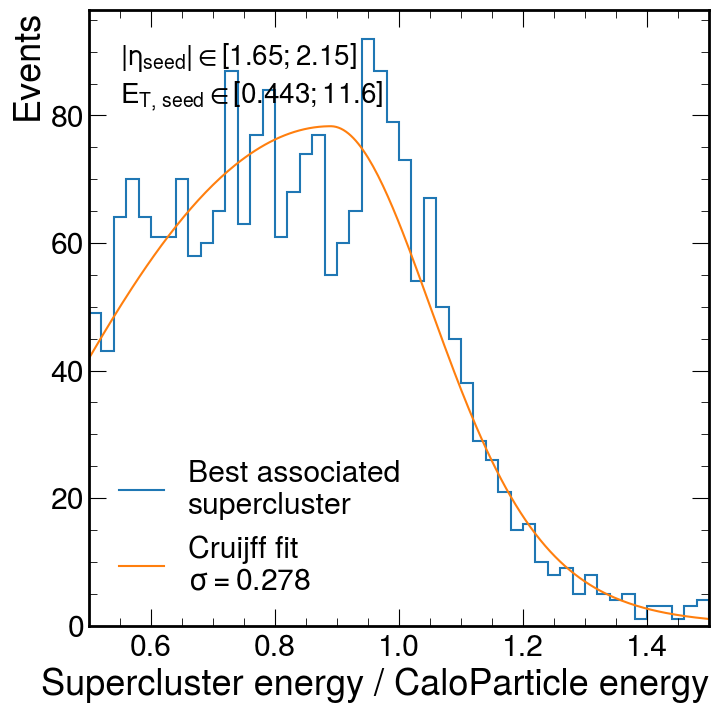

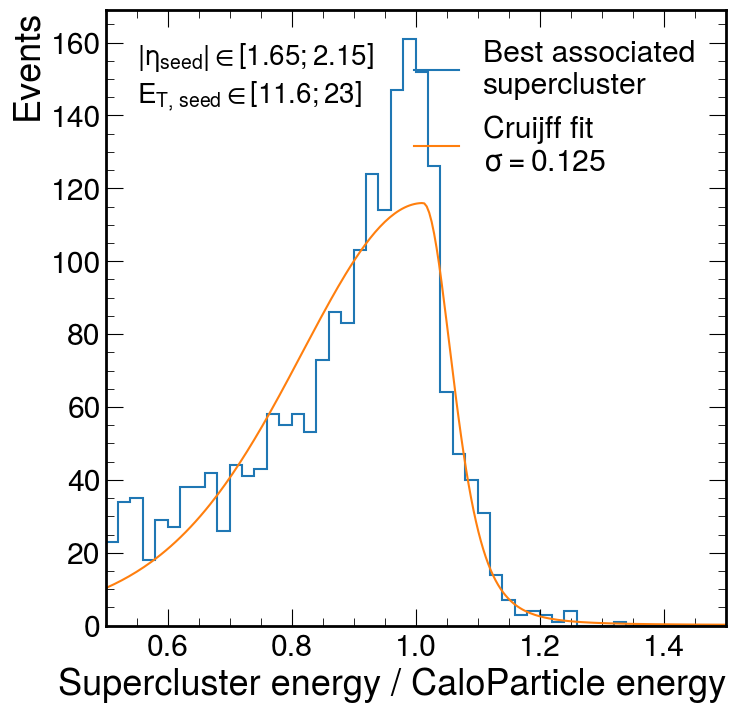

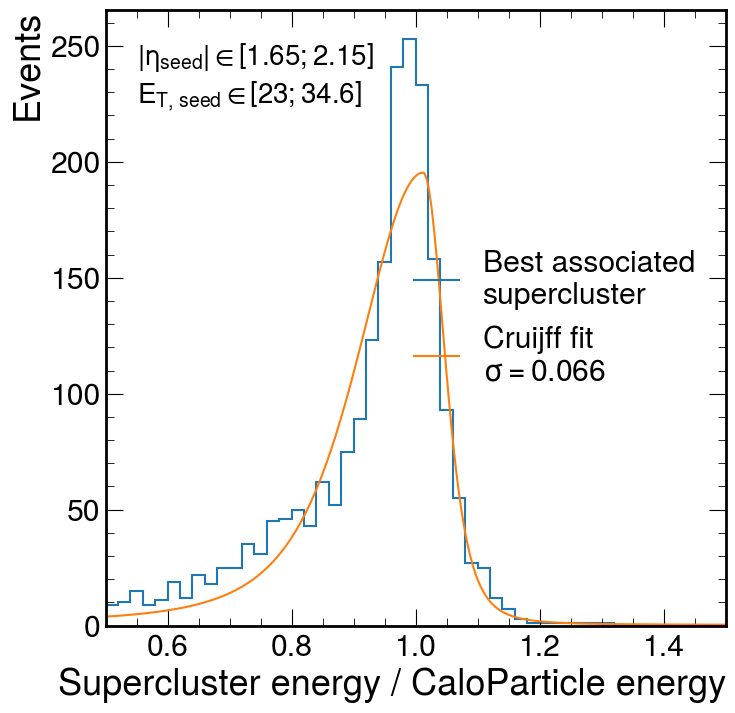

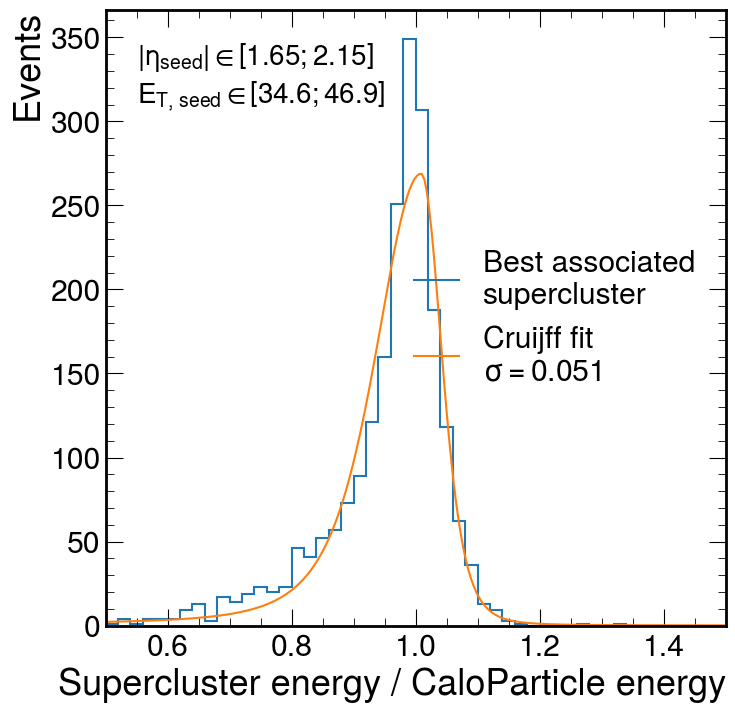

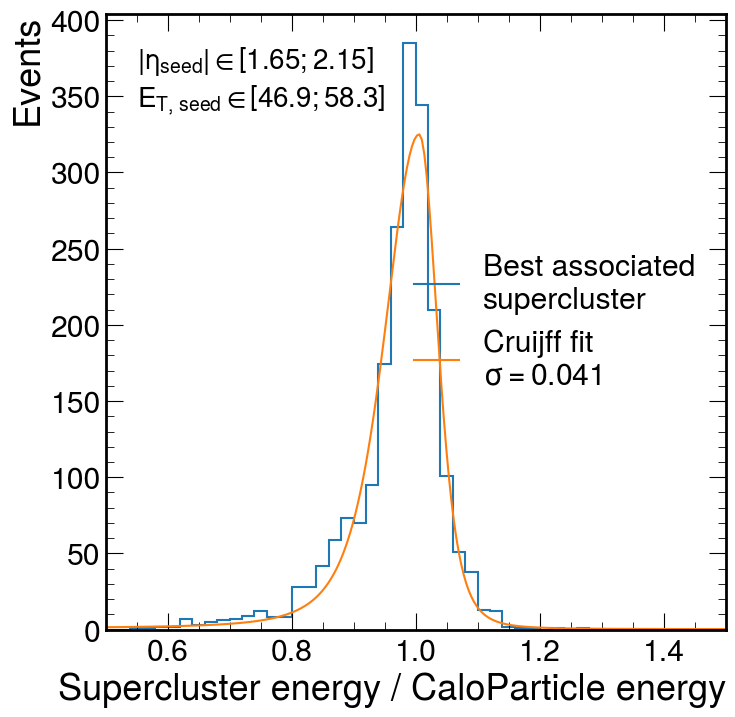

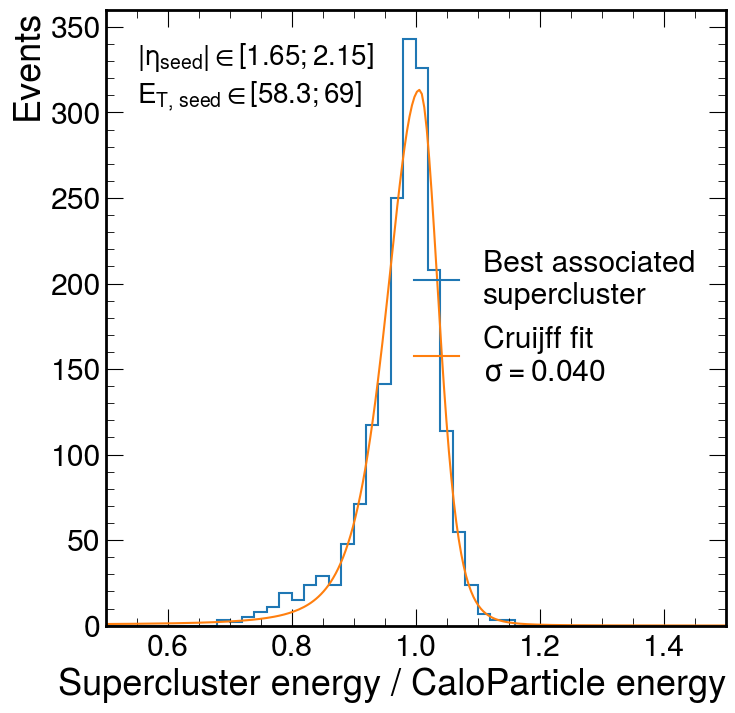

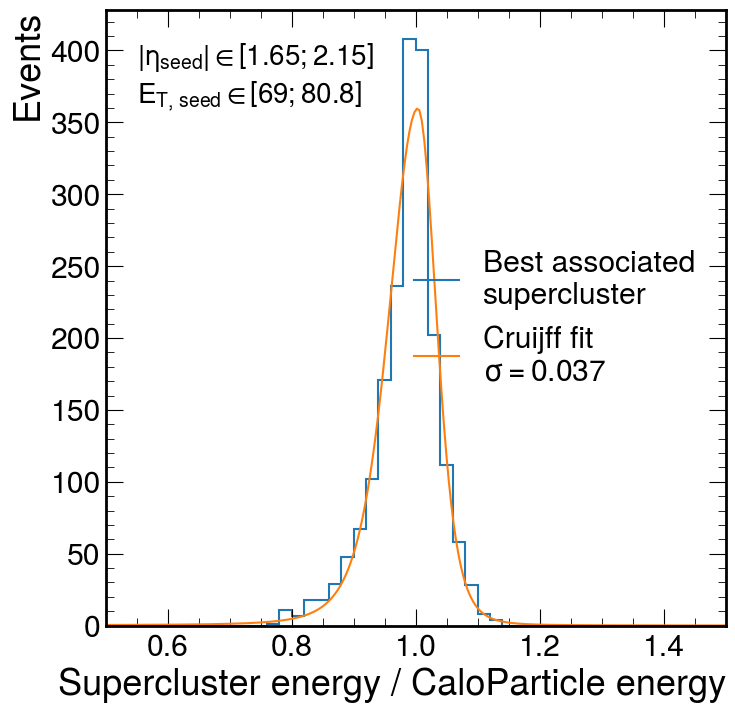

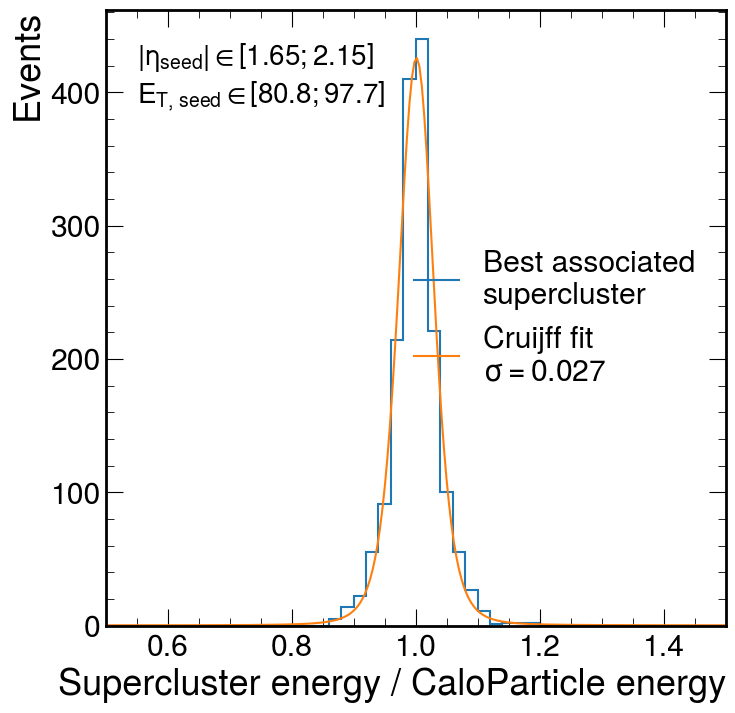

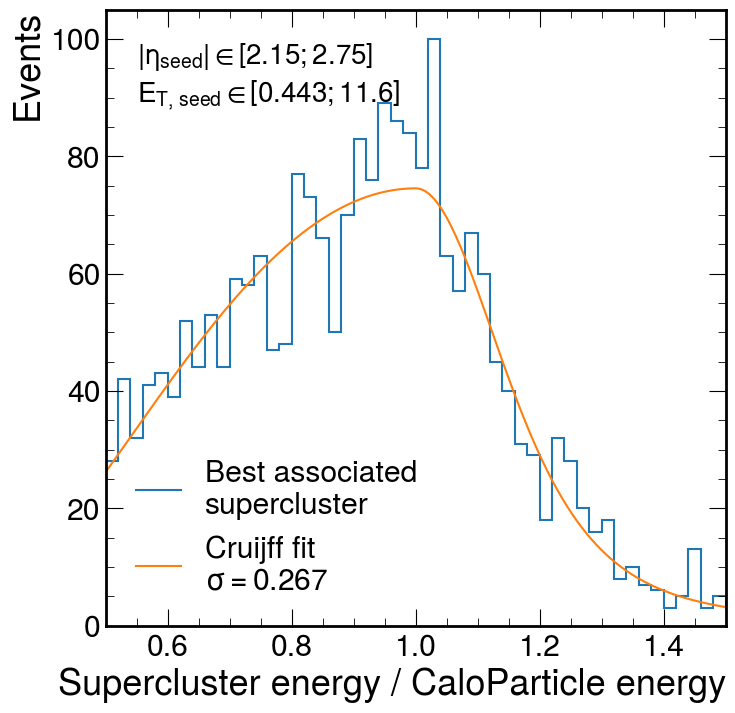

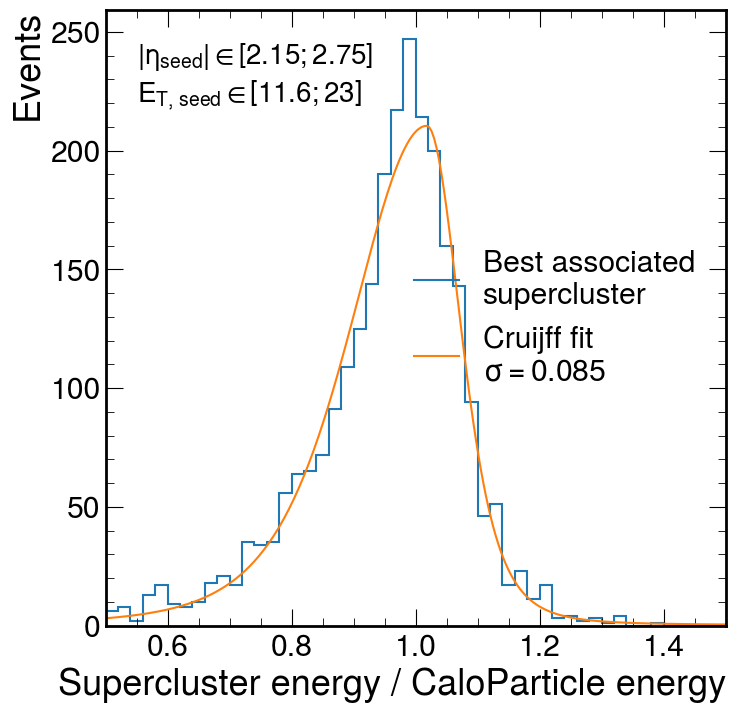

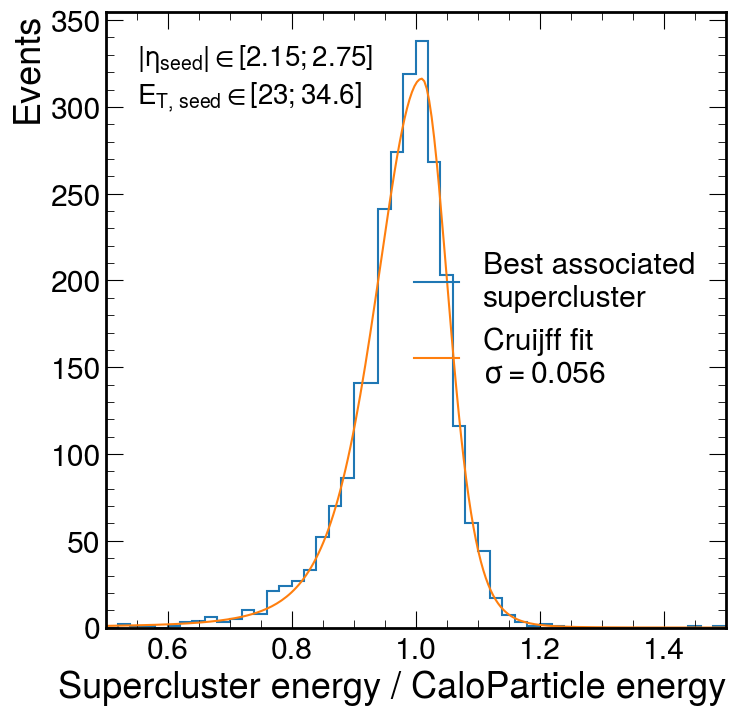

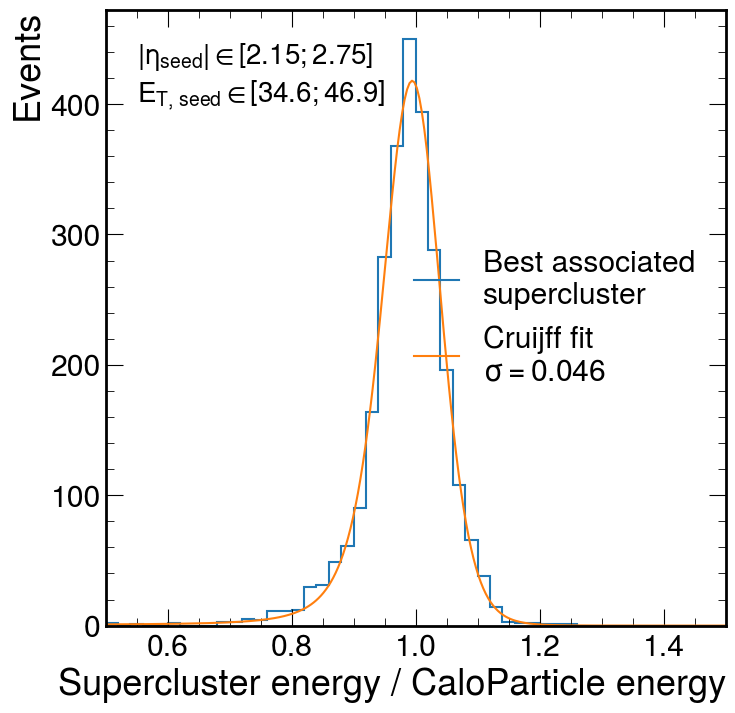

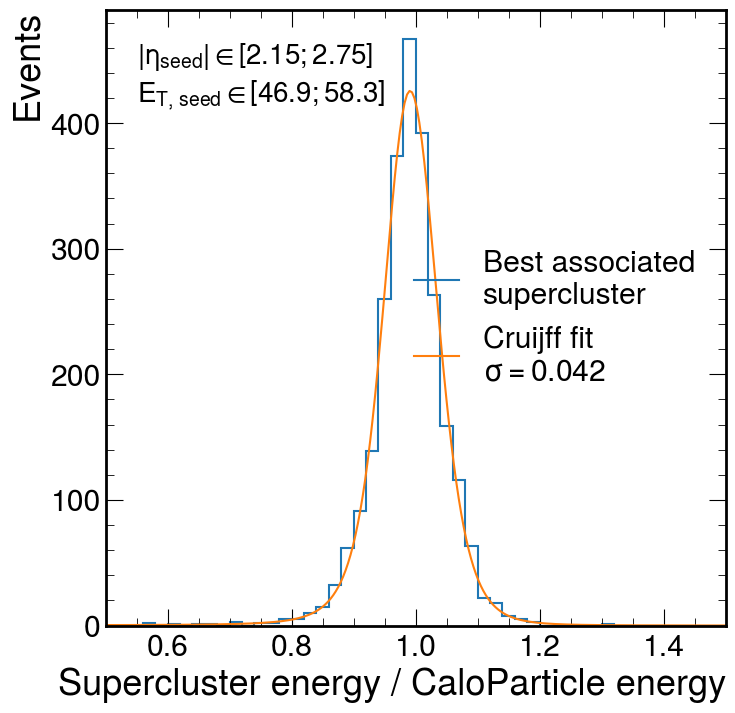

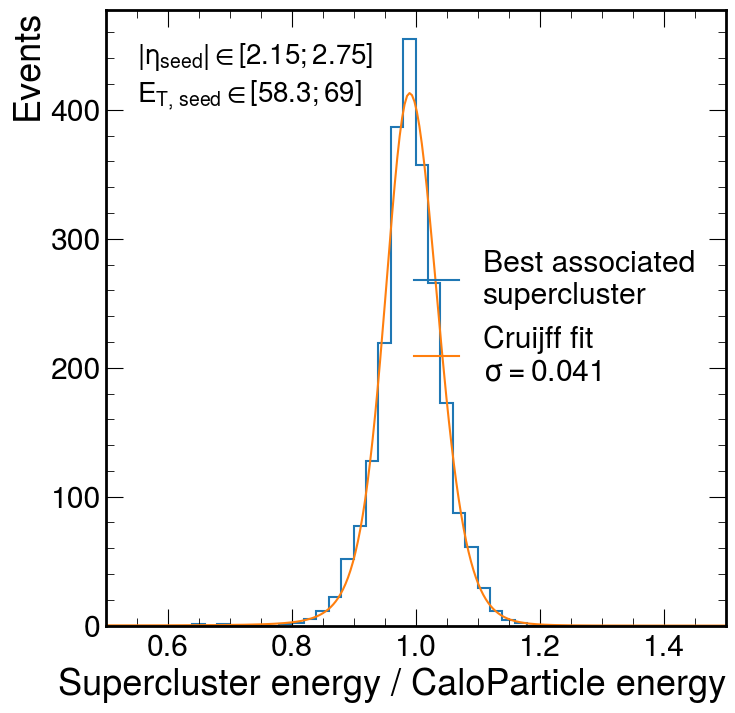

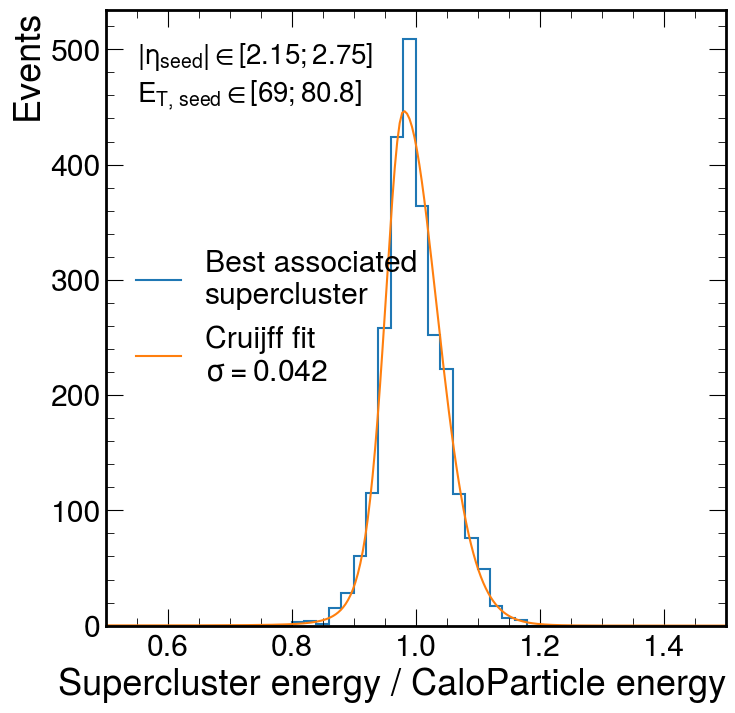

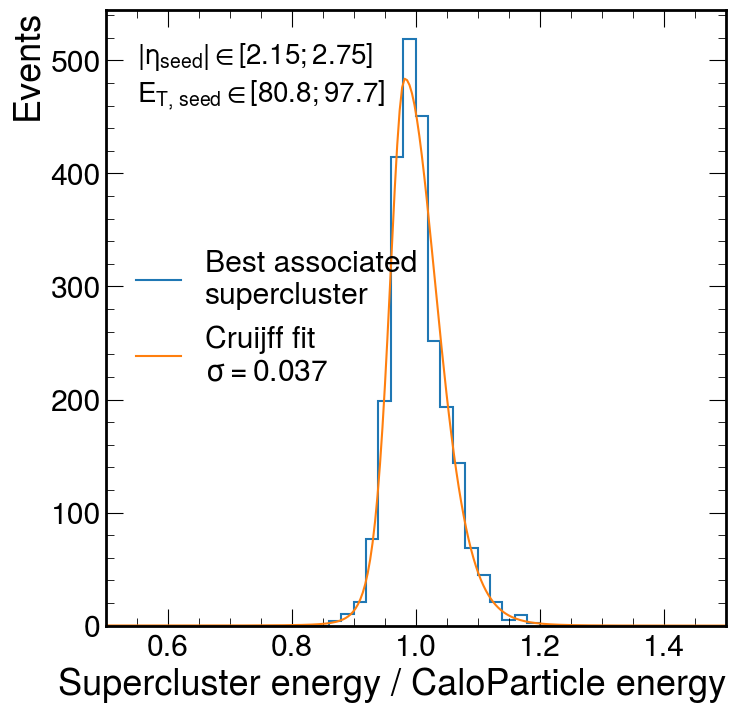

In [16]:
plotAllFits(h_scOverCP_energy, scOverCP_fit)

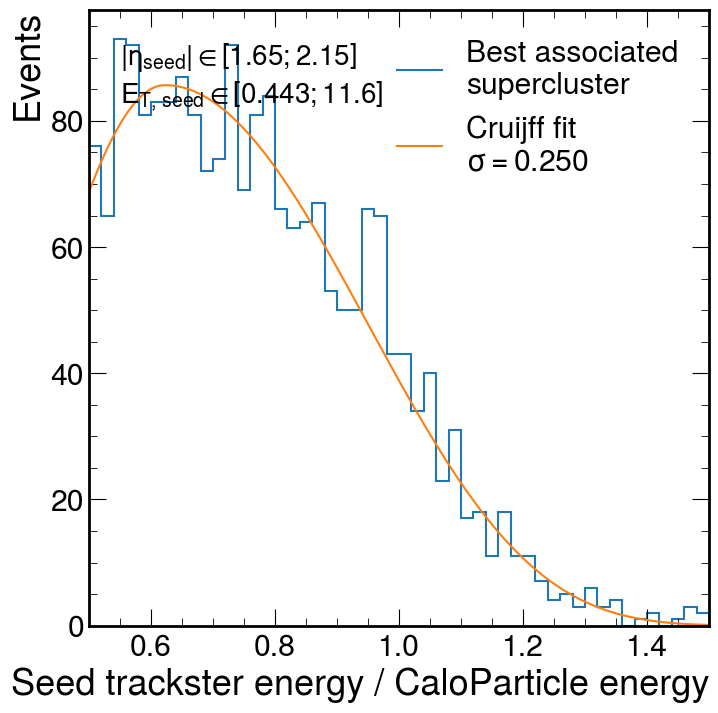

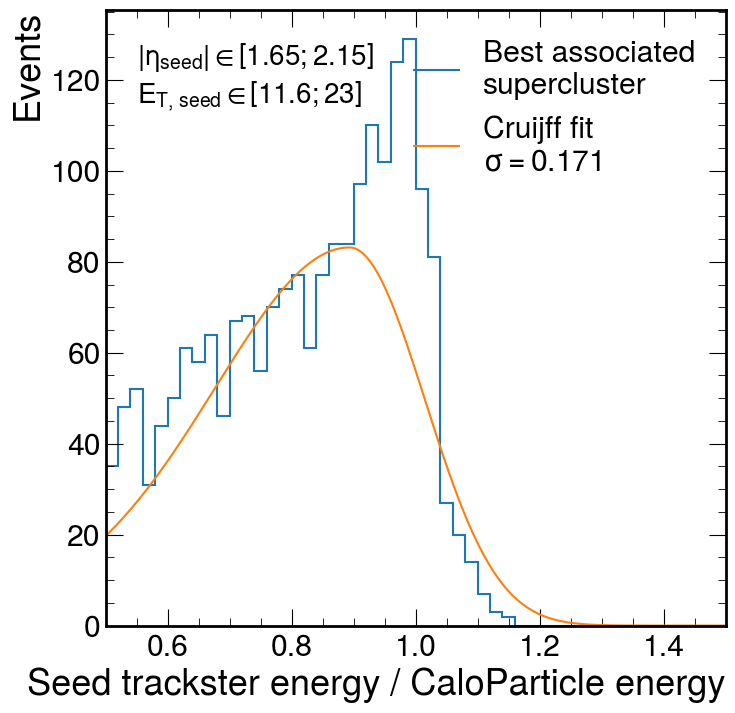

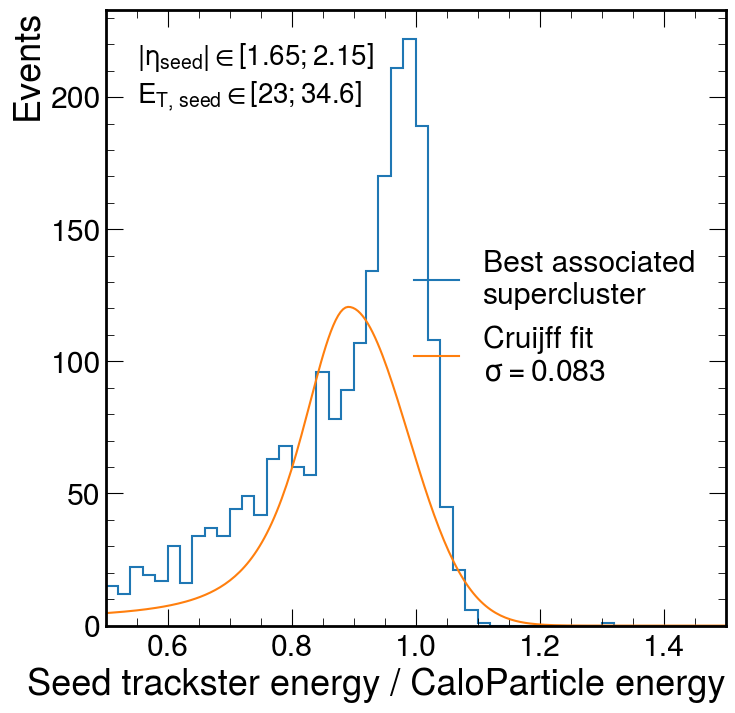

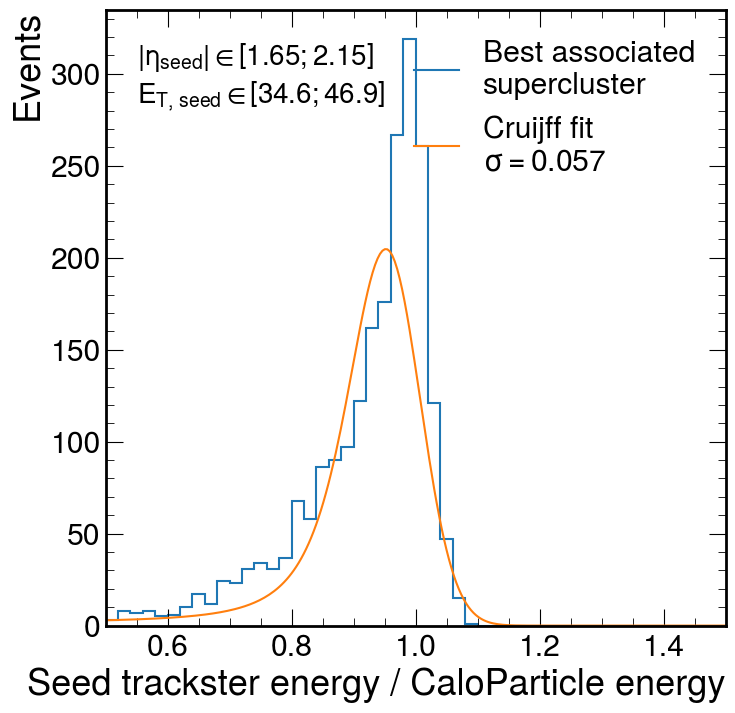

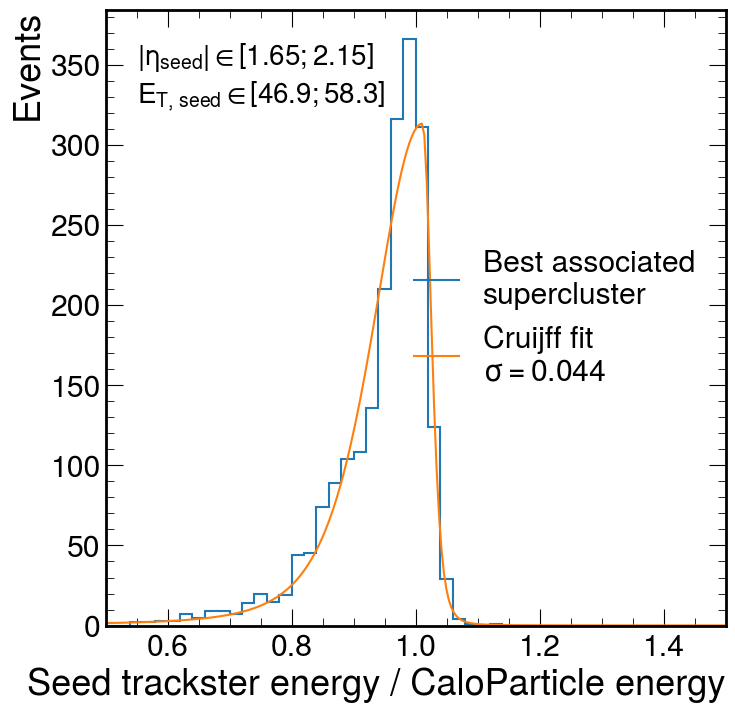

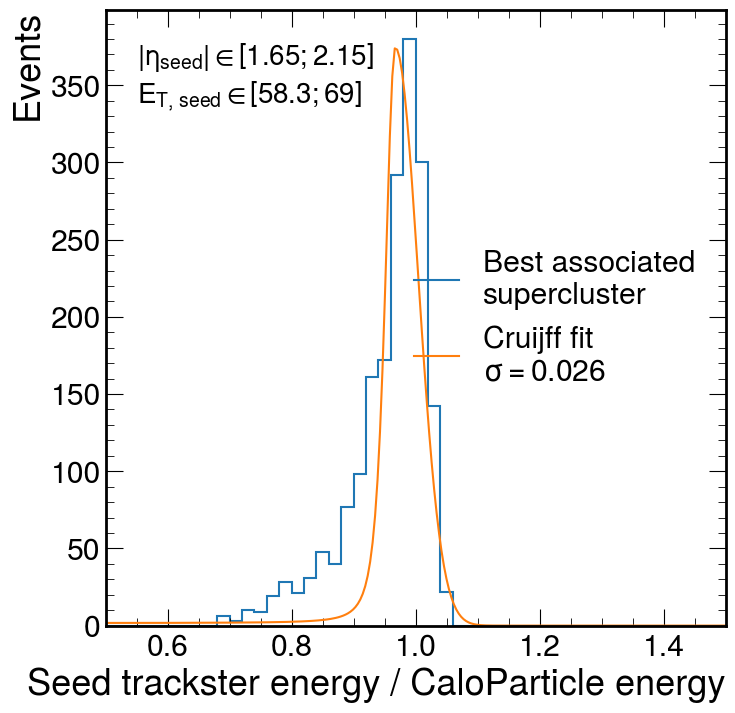

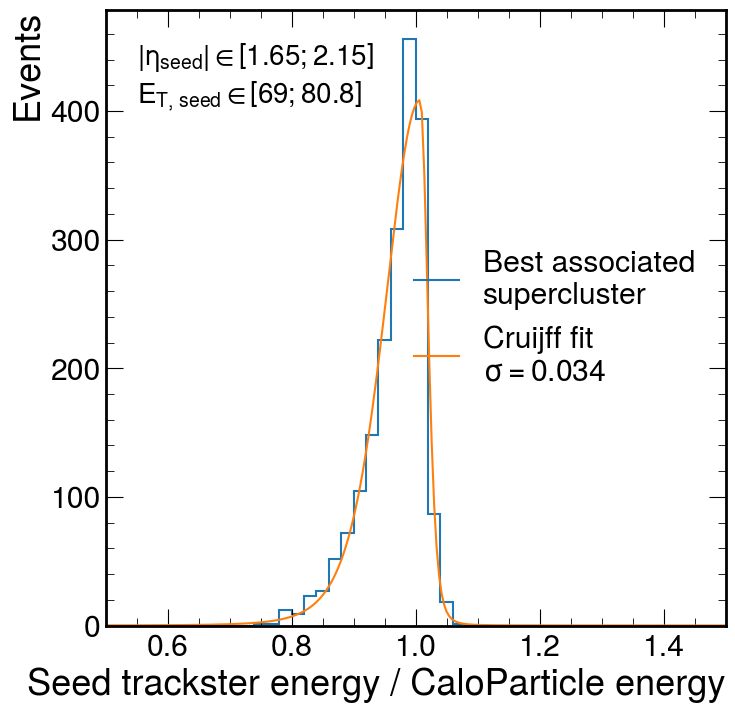

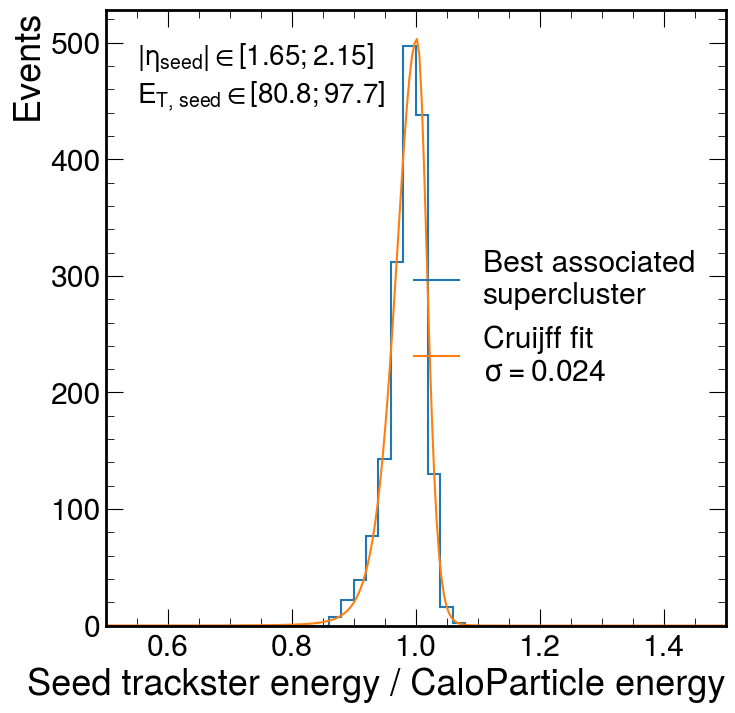

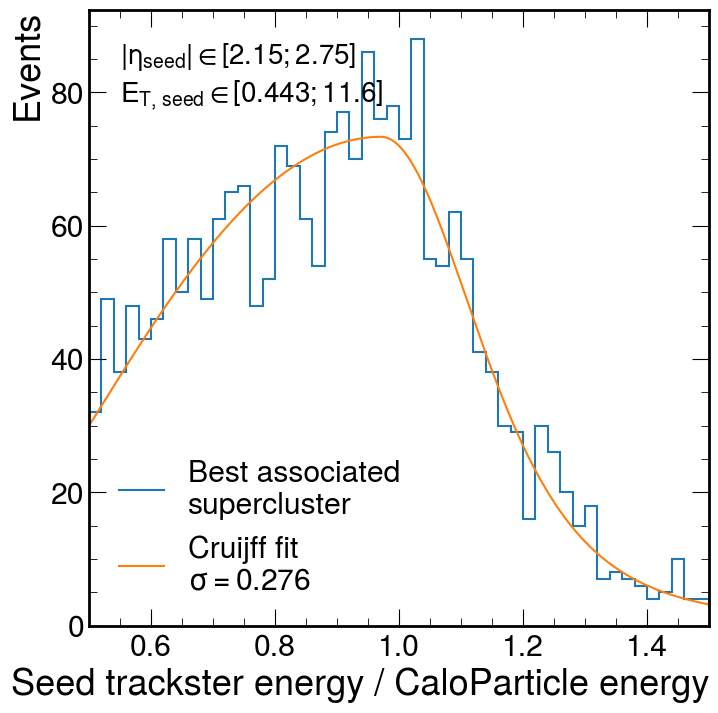

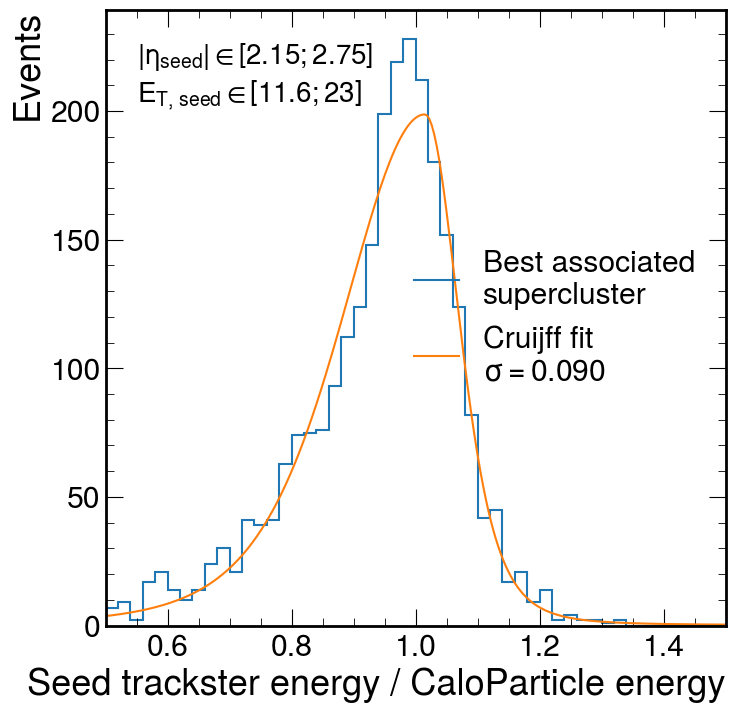

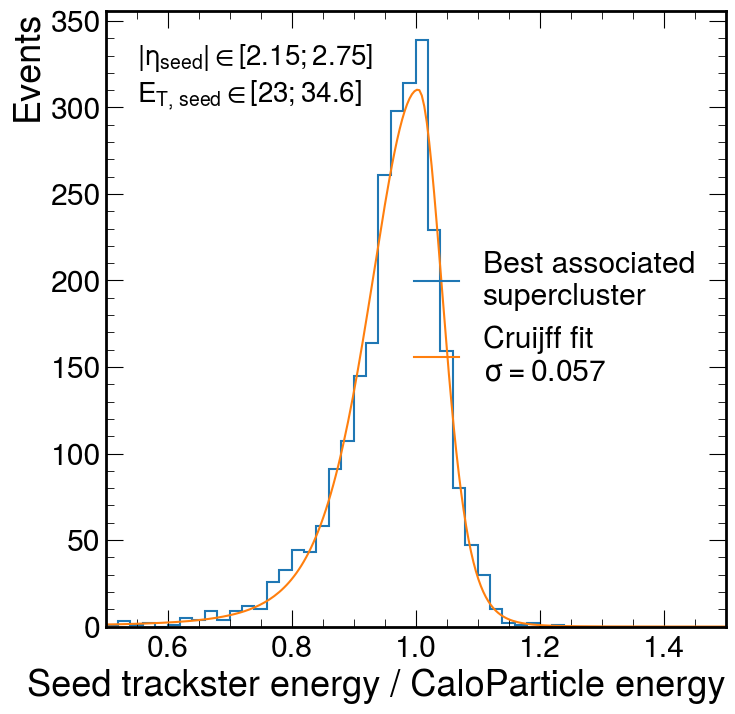

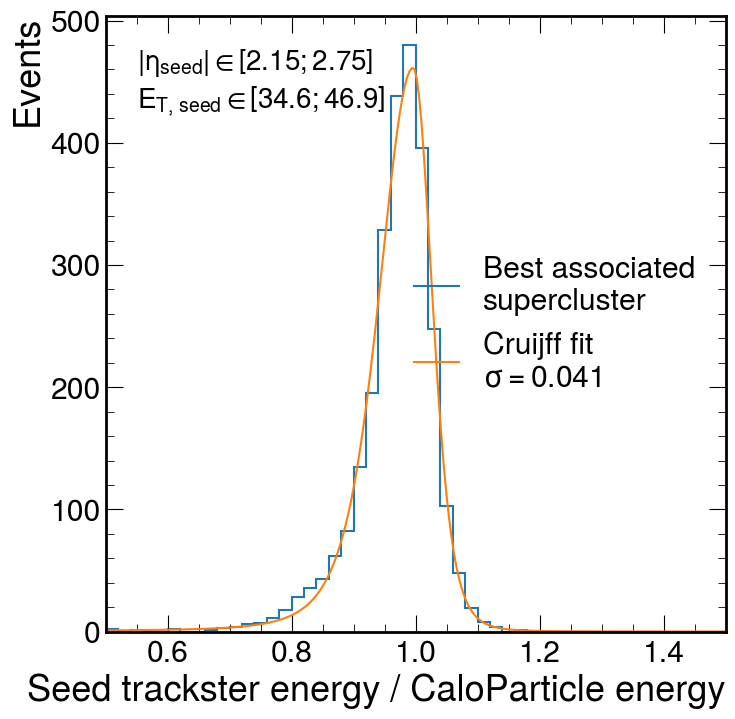

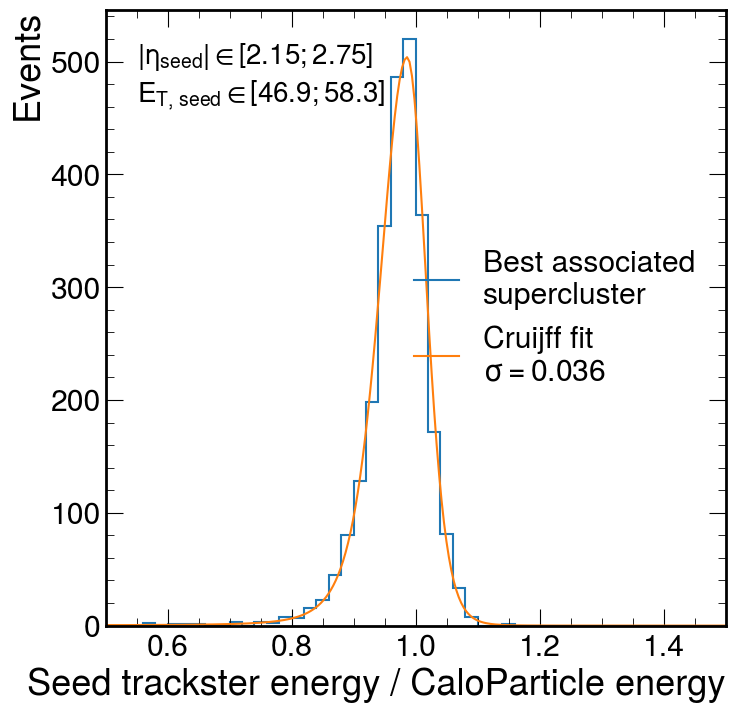

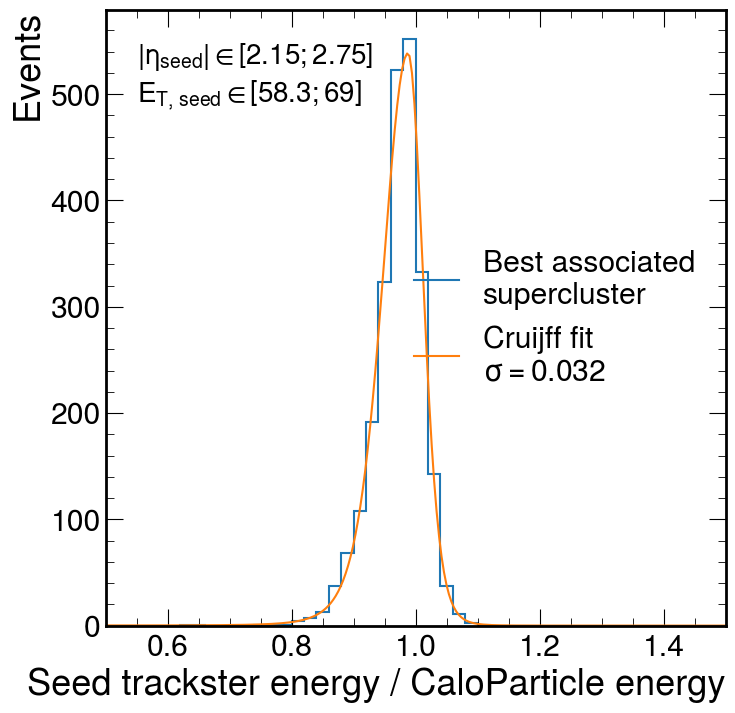

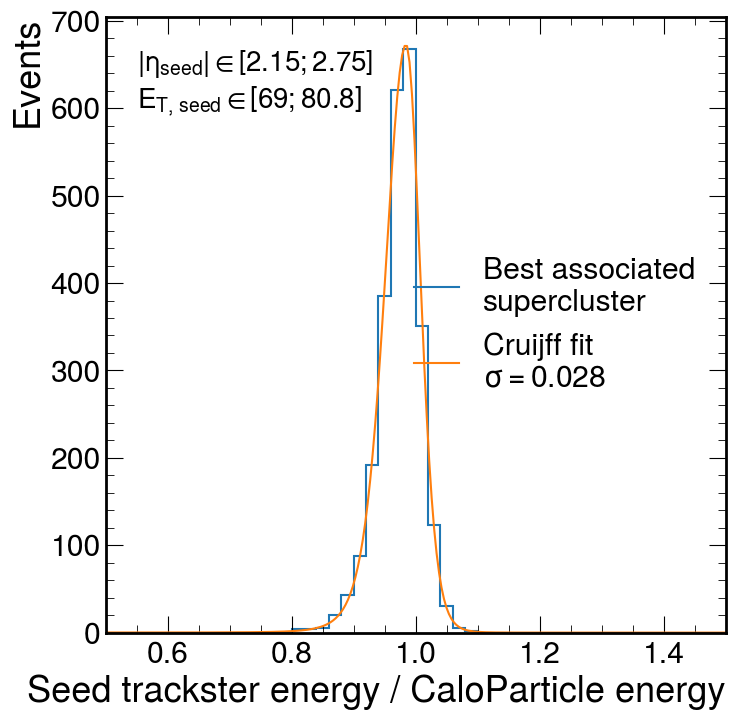

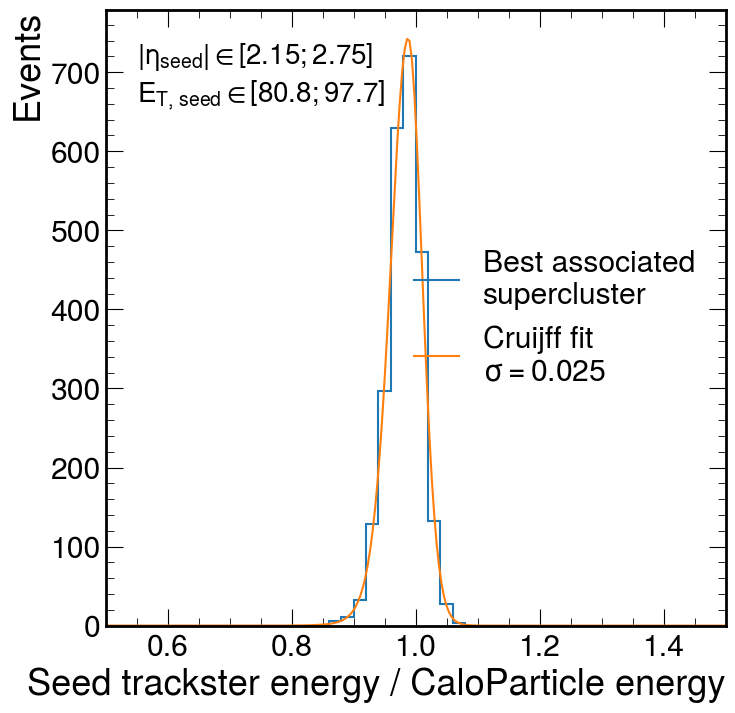

In [17]:
plotAllFits(h_seedOverCP_energy, seedOverCP_fit)

In [21]:
def plotResolution(fitRes:dict[str, list[list[CruijffFitResult]]], legendLabel:dict[str, str]=None, 
              plotMode:Literal["sigma", "mu"]="sigma", ratio:bool=False,
              colors_eta=['tab:blue', 'tab:red', 'tab:green', 'tab:purple'],
              errorbar_common_kwargs=dict(markeredgewidth=1.5, capsize=5, lw=1.5),
              errorbar_individual_kwargs=[ dict(fmt='.', markersize=10), dict(fmt='s', markersize=8, mfc='w'),]):
    """ 
    Parameters : (typeOfData is scOverCP or tsOverCP)
     - fitRes is dict : typeOfData -> 2D list eta*Et of CruiffFitResult
     - legendLabel : dict : typeOfData -> legend label for typeOfData
     - plotMode : plot sigma or mu
    """
    if legendLabel is None:
        legendLabel = {typeOfData : typeOfData for typeOfData in fitRes}
    if ratio:
        assert len(fitRes) == 2, "Ratio mode requires excatly 2 plots"
        fig = plt.figure(figsize=(8, 9))
        grid = fig.add_gridspec(2, 1, hspace=0.08, height_ratios=[3, 1])
        main_ax = fig.add_subplot(grid[0])
        ratio_ax = fig.add_subplot(grid[1], sharex=main_ax)
        plt.setp(main_ax.get_xticklabels(), visible=False)
        if plotMode == "sigma":
            ratio_ax.set_ylabel(r'$\sigma_{DNN} / \sigma_{mainTs}$')
        elif plotMode == "mu":
            ratio_ax.set_ylabel(r'$\mu_{DNN} / \mu_{mainTs}$')
        ratio_ax.axhline(y=1, color='gray', linestyle='--')
    else:
        fig, main_ax = plt.subplots(figsize=(9, 8))
    
    for eta_bin in range(len(eta_axis)):
        #for seedPt_bin in range(len(h.axes["seedPt"])):
        yvals_list = []
        xerr_vals = []
        for i, (typeOfData, currentFitResults) in enumerate(fitRes.items()):
            if i == 0:
                xerr = seedPt_axis.widths/2
                xerr_vals.append(xerr)
            else:
                xerr = None
            if plotMode == "sigma":
                yvals = [res.params.sigmaAverage for res in currentFitResults[eta_bin]]
            elif plotMode == "mu":
                yvals = [res.params.m for res in currentFitResults[eta_bin]]
            main_ax.errorbar(seedPt_axis.centers, yvals, xerr=xerr, 
                **(dict(color=colors_eta[eta_bin])|errorbar_common_kwargs|errorbar_individual_kwargs[i]))
            yvals_list.append(yvals)
            #main_ax.errorbar(seedPt_axis.centers, [res.params.sigmaAverage for res in currentFitResults[eta_bin]], xerr=seedPt_axis.widths/2, fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors_eta[eta_bin])
            #axs[0].errorbar(bins_mean, sigma_v2, fmt='s', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, color=colors_eta[b], mfc='w')
        if ratio:
            ratio_vals = np.array(yvals_list[1])/np.array(yvals_list[0])
            ratio_ax.errorbar(seedPt_axis.centers, ratio_vals, xerr=xerr_vals[0], fmt='x', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8,
                color=colors_eta[eta_bin])
        #makeRatio(main_ax,inset_axs0, sigma_v2, sigma_mous, colors_eta[b], bins_mean, bins_width, False)
        ## For the legend
        main_ax.errorbar([], [], xerr = [], **(dict(color=colors_eta[eta_bin])|errorbar_common_kwargs|errorbar_individual_kwargs[0]), label=etaBinToText(eta_bin))
    
    for typeOfData, errorbar_kwargs in zip(fitRes.keys(), errorbar_individual_kwargs): # legend
        main_ax.errorbar([], [], xerr = [], **errorbar_kwargs, color='black', label=legendLabel[typeOfData])
    main_ax.legend()
    if plotMode == "sigma":
        main_ax.set_ylabel(r'$\sigma(E_{SC}/E_{GEN})$')
    elif plotMode == "mu":
        main_ax.set_ylabel(r'$\mu(E_{SC}/E_{GEN})$')

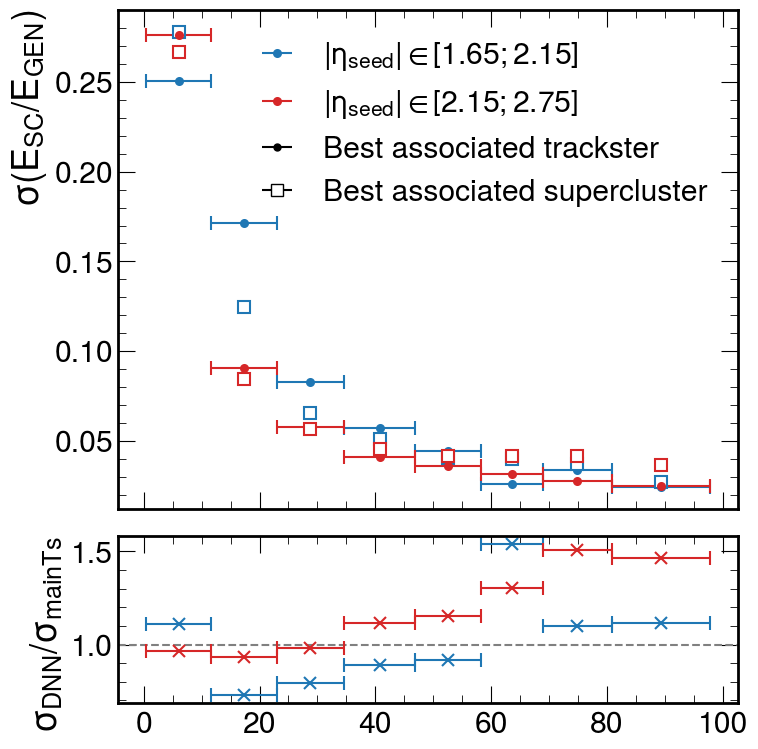

In [22]:
plotResolution({"tsOverCP":seedOverCP_fit, "scOverCP": scOverCP_fit}, legendLabel={"scOverCP" : "Best associated supercluster", "tsOverCP" : "Best associated trackster"},
    ratio=True)

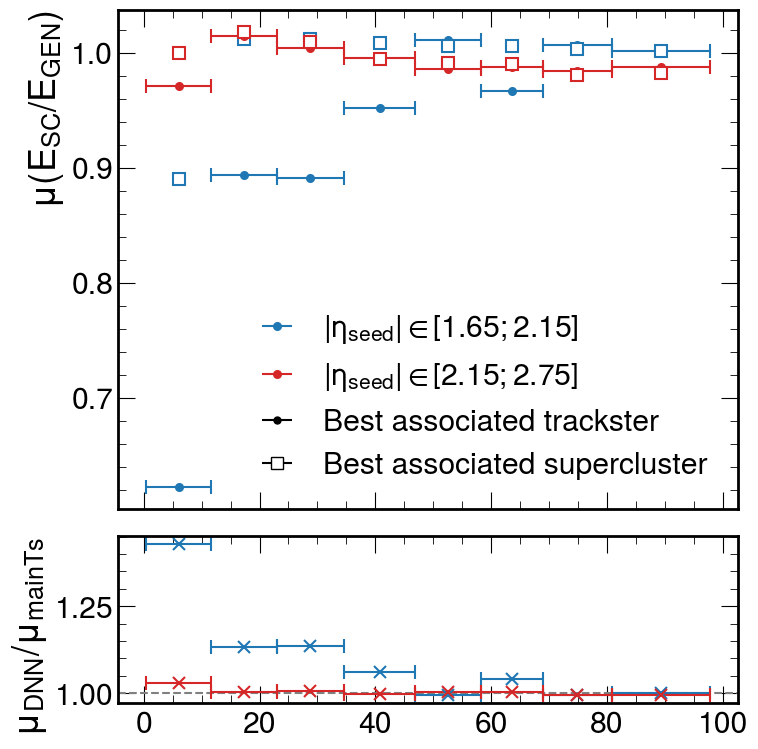

In [23]:
plotResolution({"tsOverCP":seedOverCP_fit, "scOverCP": scOverCP_fit}, plotMode="mu", 
               legendLabel={"scOverCP" : "Best associated supercluster", "tsOverCP" : "Best associated trackster"},
               ratio=True)